# ECE795 Advanced Big Data Analytics Homework 6 (Due 4/14/2022, 100 Total Points)

Please create a Dataproc cluster in Google Cloud Platform, access the master node using ssh, and answer the following questions.

In your answers, please provide necessary contents, including commands, screenshots and the outputs of the commands.

## Access HDFS with Command Line in Google Cloud

### Q1 (10 points). Please describe how you ssh to the master node of your Dataproc cluster.

In [ ]:
# Your answer
Click SSH in VM instance

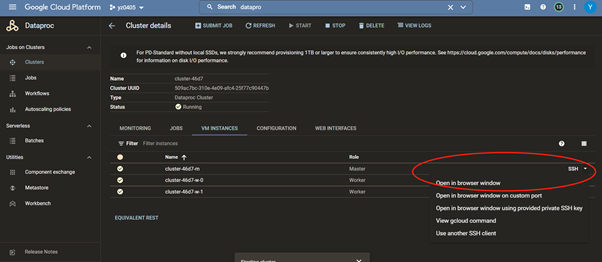

In [ ]:
from IPython.display import Image, display
display(Image('/content/Q1.png', width=600, height=300))

### Q2 (10 points). What are the contents in the root directory and /user directory in HDFS?


In [ ]:
# Your answer

pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -ls /
Found 3 items
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:55 /tmp
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:58 /user
drwx-wx-wx   - hive hadoop          0 2022-04-06 20:55 /var

pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -ls /user
Found 10 items
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/dataproc
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/hbase
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/hdfs
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/hive
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/mapred
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/pig
drwxr-xr-x   - root hadoop          0 2022-04-06 20:58 /user/root
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/spark
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/yarn
drwxrwxrwt   - hdfs hadoop          0 2022-04-06 20:54 /user/zookeeper

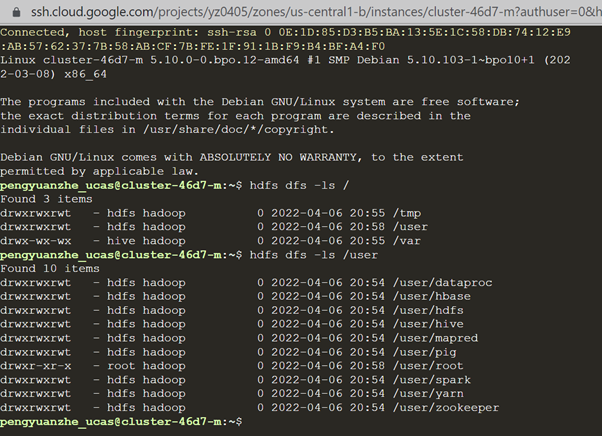

In [ ]:
display(Image('/content/Q2.png', width=800, height=500))

### Q3 (10 points). Create a folder called "data" in your home directory in HDFS (/user/your_username). Download the file from Google Cloud Storage by the provided command and upload the file `kinglear.txt` to your home directory in HDFS. 

In [ ]:
gsutil cat "gs://dataflow-samples/shakespeare/kinglear.txt" > kinglear.txt

In [ ]:
# Your answer

pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -mkdir /user/pengyuanzhe_ucas
pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -mkdir /user/pengyuanzhe_ucas/data
pengyuanzhe_ucas@cluster-46d7-m:~$ gsutil cat "gs://dataflow-samples/shakespeare/kinglear.txt" > kinglear.txt
pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -put kinglear.txt kinglear.txt
pengyuanzhe_ucas@cluster-46d7-m:~$ ls -1
kinglear.txt
pengyuanzhe_ucas@cluster-46d7-m:~$ pwd
/home/pengyuanzhe_ucas

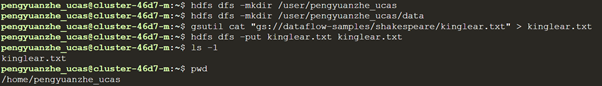

In [ ]:
display(Image('/content/Q3.png', width=800, height=150))

### Q4 (10 points). In your home directory in HDFS, execute the provided command that creates a folder called `dir_example` as well as the contents inside the folder. Then remove the entire folder.


In [ ]:
bash -c -v "mkdir dir_example; touch dir_example/{a..z}.txt"

In [ ]:
# Your answer

pengyuanzhe_ucas@cluster-46d7-m:~$ bash -c -v "mkdir dir_example; touch dir_example/{a..z}.txt"
mkdir dir_example; touch dir_example/{a..z}.txt
pengyuanzhe_ucas@cluster-46d7-m:~$ 
pengyuanzhe_ucas@cluster-46d7-m:~$ ls -1
dir_example
kinglear.txt
pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -rm -r dir_example
Deleted dir_example

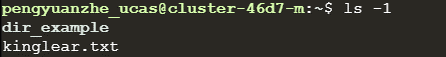

In [ ]:
display(Image('/content/Q4.png', width=400, height=50))

In [ ]:
display(Image('/content/Q4_2.png', width=400, height=30))

### Q5 (10 points). Print the first 10 lines in the file `kinglear.txt` stored in HDFS

In [ ]:
# Your answer
pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -cat kinglear.txt | head -10
        KING LEAR


        DRAMATIS PERSONAE


LEAR    king of Britain  (KING LEAR:)

KING OF FRANCE:


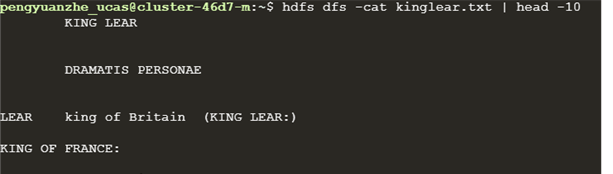

In [ ]:
display(Image('/content/Q5.png', width=1000, height=400))

### Q6 (20 points). Write a PySpark program to perform word count on `kinglear.txt`. Save the output to HDFS.

In [ ]:
# Your answer

# yz_wordcount.py:
import pyspark
from pyspark import SparkConf, SparkContext
sc = SparkContext.getOrCreate()
mydata = sc.textFile('kinglear.txt')
word_count = mydata.flatMap(lambda x: x.split(' ')).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)
word_count.saveAsTextFile('output.txt')
#############################################################################
pengyuanzhe_ucas@cluster-46d7-m:~$ python yz_wordcount.py
pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -put output.txt output.txt

***some content of output:***

('of', 433)
('daughters', 9)
('Lear.', 1)
('ACT', 26)
('SCENE', 26)
('GLOUCESTER,', 11)
('thought', 11)
('king', 27)
('more', 53)
('affected', 1)
('but', 76)
('in', 248)
('he', 128)
('most;', 2)
('equalities', 1)
('are', 109)
('this', 153)
('sir,', 47)
('at', 54)
('charge:', 1)
('acknowledge', 2)
('now', 19)
('am', 77)
('cannot', 17)
('young', 6)
('could:', 1)
('whereupon', 1)
('indeed,', 1)
('law,', 1)
('year', 1)
('is', 181)
('no', 79)
('dearer', 1)
('knave', 3)
('came', 12)
('amorous', 1)
('us', 29)
('both', 8)
('territory,', 1)
('say', 19)
('doth', 14)
('may', 44)
('forests', 1)
('champains', 1)
("rich'd,", 1)
('plenteous', 1)
('thine', 16)
('says', 4)
('dearest', 1)
('Cornwall?', 2)
('Speak.', 4)
('metal', 1)
('sister', 15)
('is,', 5)
('prize', 1)
('worth.', 2)
('true', 6)
('heart', 20)
('less.', 2)
('mend', 1)
('mar', 5)
('fortunes.', 2)
('lord,', 34)
('begot', 2)
('bred', 1)
('loved', 6)
('duties', 2)
('right', 3)
('honour', 5)
('husbands,', 1)
('Haply,', 1)
('when', 35)
('take', 52)
('carry', 6)
('duty:', 1)
('thee,', 25)
('ever.', 2)
('Scythian,', 1)
('generation', 1)
('gorge', 1)
('appetite,', 1)
('bosom', 2)
("neighbour'd,", 1)
('relieved,', 1)
('thou', 164)
('two', 23)
('course,', 2)
('knights,', 2)
('abode', 1)
('due', 3)
('additions', 1)
('execution', 1)
('rest,', 3)
('betwixt', 3)
('Lear,', 7)
("honour'd", 2)
('king,', 12)
('master', 8)
('fall', 5)
('though', 14)
('fork', 1)
('invade', 1)
('region', 1)
('heart:', 3)
('do,', 5)
('duty', 6)
('low', 3)
('sound', 4)
('hollowness.', 1)
('wage', 2)
('against', 18)
('enemies;', 1)
('good,', 2)
('oath,', 2)
('leave', 7)
('stray,', 1)
('match', 2)
('where', 21)
('hate;', 1)
('avert', 1)
('she,', 1)
('object,', 3)
('praise,', 1)
('balm', 1)
('age,', 4)
('dearest,', 1)
('murder,', 2)
('grace', 9)
('favour;', 1)
('commit', 2)
('alas,', 1)
('certain,', 3)
('look', 11)
('imperfections', 1)
('wherefore', 2)
('mind', 8)
('letter,', 3)
('offend,', 2)
('detain', 1)
('understand', 3)
('them,', 8)
('blame.', 2)
......

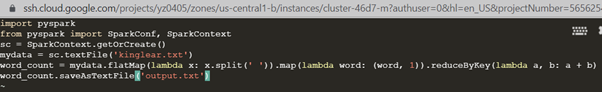

In [ ]:
display(Image('/content/Q6.png', width=1000, height=200))

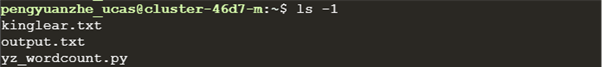

In [ ]:
display(Image('/content/Q6_2.png', width=600, height=100))

### Q7 (10 points). Download your output file to the local storage of the master node.

In [ ]:
# Your answer
pengyuanzhe_ucas@cluster-46d7-m:~$ hdfs dfs -get output.txt output.txt

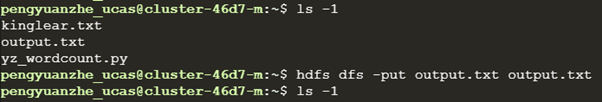

In [ ]:
display(Image('/content/Q7.png', width=600, height=100))

### Q8 (20 points). Modify the word count program and save the output as avro or parquet formats.

In [ ]:
# Your answer

#  Modify_yz_wordcount.py:
import pyspark
from pyspark import SparkConf, SparkContext
sc = SparkContext.getOrCreate()
mydata = sc.textFile('kinglear.txt')
word_count = mydata.flatMap(lambda x: x.split(' ')).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)
word_count.write.format("avro").save("output.avro")
# word_count.write.format("parquet").save("output.parquet")

pengyuanzhe_ucas@cluster-46d7-m:~$ python Modify_yz_wordcount.py
pengyuanzhe_ucas@cluster-46d7-m:~$ ls -1
kinglear.txt
output.avro
output.txt
yz_wordcount.py

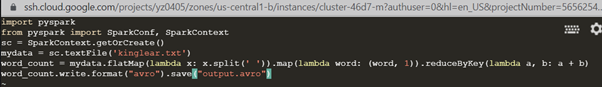

In [ ]:
display(Image('/content/Q8.png', width=1000, height=200))

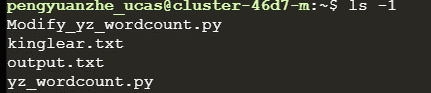

In [ ]:
display(Image('/content/Q8_1.png', width=100, height=20))

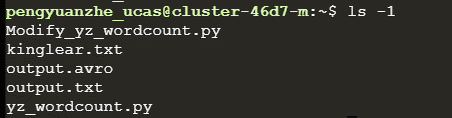

In [ ]:
display(Image('/content/Q8_2.png', width=100, height=20))